In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

# Simple Linear Regression

### Function:  
$$f(x)=w_0+w_1x$$

#### Variables:  
$
\begin{align}
x & = \textrm{feature 1 or input to the model} \\
w_0 & = \textrm{weight 0 or intersection} \\
w_1 & = \textrm{weight 1 or gradient of x}
\end{align}
$

#### Note:  
A simple linear regression is can only deal with 2 weights, $w_0$ and $w_1$. This equation is essentially $y=mx+c$, where two variables $m$ or $w_1$ and $c$ or $w_0$ needs to be solved or trained.

#### Example:
---

$
\begin{align}
x & = [3, 4, 2] \\
w_0 & = 0.5 \\
w_1 & = 0.8 \\
\end{align}
$

---

$
\begin{align}
f(x_1) & = 0.5+0.8*3 = 2.9 \\
f(x_2) & = 0.5+0.8*4 = 3.7 \\
f(x_3) & = 0.5+0.8*2 = 2.1 \\
\end{align}
$

---

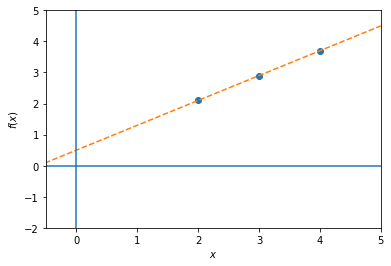

In [2]:
plt.plot([3, 4, 2], [2.9, 3.7, 2.1], "o")
plt.plot([-1, 0, 1, 2, 3, 4, 5], [-0.3, 0.5, 1.3, 2.1, 2.9, 3.7, 4.5], "--")
plt.xlim((-0.5, 5))
plt.ylim((-2, 5))
plt.axhline(0)
plt.axvline(0)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

The above graph shows the output of the model, where $w_0=0.5$, and $w_1=0.8$

<img src="../images/simple_linear_regression_02.png">

### Loss Function (Residual Sum of Squares, https://en.wikipedia.org/wiki/Residual_sum_of_squares):

\begin{align}
RSS(w_0, w_1) & = \sum_{i=1}^{N}(y_i-\hat y_i)^2 \\
& = \sum_{i=1}^{N}(y_i-f(x_i))^2 \\
& = \sum_{i=1}^{N}(y_i-(w_0+w_1x_i))^2
\end{align}
    
#### Variables:  

$
\begin{align}
N & = \textrm{the total number of examples (or rows) in the dataset} \\
i & = \textrm{index i} \\
x_i & = \textrm{ith input to the model} \\
y & = \textrm{ith value} \\
\hat y & = \textrm{ith predicted value} \\
\end{align}
$

#### Note:
Since $\hat y_i$ is a predicted value, we can place our simple linear equation $f(x)=w_0+w_1x$ in place of $\hat y_i$

#### Example:
---

$
\begin{align}
y & = [3.5, 3.8, 1.8] \\
x & = [3, 4, 2] \\
w_0 & = 0.5 \\
w_1 & = 0.8 \\
\end{align}
$

---
Find $\hat y$

$
\begin{align}
f(x_1) & = 0.5+0.8*3 = 2.9 \\
f(x_2) & = 0.5+0.8*4 = 3.7 \\
f(x_3) & = 0.5+0.8*2 = 2.1 \\
\hat y & = [2.9, 3.7, 2.1] \\
\end{align}
$

---
Solve for $RSS$

$
\begin{align}
RSS(w_0, w_1) & = \sum_{i=1}^{N}(y_i-\hat y_i)^2 \\
& = (3.5-2.9)^2+(3.8-3.7)^2+(1.8-2.1)^2 \\
& = 0.46 \\
\end{align}
$

---
#### Code:

In [3]:
def RSS(real_y, predicted_y):
    """Compute RSS between two np.array.
    
    Takes two lists, and subtract them element wise, and take the power of each result, then sum them up.
    
    Args:
        real_y (np.array): Real y values.
        predicted_y (np.array): Predicted y values.
        
    Returns:
        np.float: RSS value.
    
    """
    return np.sum(np.power(real_y-predicted_y, 2))

#### Intuition:

Data set can be downloaded at: https://www.kaggle.com/harlfoxem/housesalesprediction

In [4]:
# Create a dictionary type to store relevant data types so that our pandas
# will read the correct information
dtype_dict = {'bathrooms': float, 'waterfront': int, 'sqft_above': int, 'sqft_living15': float,
              'grade': int, 'yr_renovated': int, 'price': float, 'bedrooms': float, 'zipcode': str,
              'long': float, 'sqft_lot15': float, 'sqft_living': float, 'floors': str, 'condition': int,
              'lat': float, 'date': str, 'sqft_basement': int, 'yr_built': int, 'id': str, 'sqft_lot': int,
              'view': int}

# Read from housing csv file
house = pd.read_csv('../../data/house_data.csv', dtype=dtype_dict)

Plot a graph with the a-axis as the price, and the y-axis as the sqft, then draw a line on the graph.

This line is the output of the model, $f(x)=w_0+w_1x$, with intercept, $w_0=1000$.

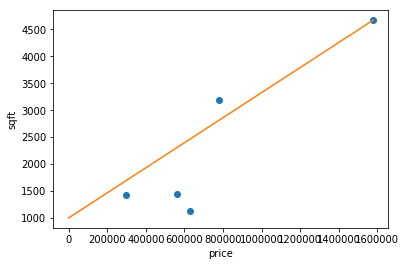

In [5]:
# We sample only 5 data values, and use a scanner plot
housing_prices = house.sample(n=5, random_state=0)

# Plot a graph using prices and sqft_living
plt.plot(housing_prices["price"], housing_prices["sqft_living"], "o")
plt.xlabel('price')
plt.ylabel('sqft')

# Draw a line from (0, 1000) to the top right hand corner
first_point_x, first_point_y = 0, 1000
second_point_x, second_point_y = housing_prices.iloc[1]["price"], housing_prices.iloc[1]["sqft_living"]
plt.plot([first_point_x, second_point_x], [first_point_y, second_point_y])
plt.show()

We can visualize the loss by drawing a perfect square between the real value, $y$, and predicted value $\hat y$.

<img src="../images/simple_linear_regression_01.png">

We want to minimize the sum of the area of all squares

#### Solving the Loss Function

There are two ways to solve:
1. Analytically: Solve for $\frac{d}{dw_0}RSS(w_0, w_1)=0$ and $\frac{d}{dw_1}RSS(w_0, w_1)=0$
2. Gradient Descent: Solve for the gradient of $RSS(w_0, w_1)$ respective to $w_0$ and $w_1$, and add the gradient values back to $w_0$, and $w_1$ respectively.


#### Compute the derivative with respect to $w_0$
---

$
\begin{align}
\frac{dRSS(w_0, w_1)}{dw_0} & = \frac{d}{dW_0}\sum^N_{i=1}(y_i-(w_1x_i+w_0))^2\\
\end{align}
$

---

$
\begin{align}
\frac{d}{dw}\sum^N_{i=1}g_i(w) & =\frac{d}{dw}(g_1(w)+g_2(w)+g_3(w)+...g_N(w))\\
& = \frac{d}{dw}g_1(w) + \frac{d}{dw}g_2(w) + \frac{d}{dw}g_3(w) +...\frac{d}{dw}g_N(w)\\
& = \sum^N_{i=1}\frac{d}{dw}g_i(w)
\end{align}
$

---

$
\begin{align}
\frac{dRSS(w_0, w_1)}{dw_0} & = \frac{d}{dW_0}\sum^N_{i=1}(y_i-(w_1x_i+w_0))^2\\
\end{align}
$

---

$
\begin{align}
\textrm{Chain Rule}: \frac{dz}{dx} & =\frac{dz}{dy}\frac{dy}{dx}=f'(x)g'(x)=f'(g(x))g'(x)
\end{align}
$

$
\begin{align}
z & = (y_i-(w_1x_i+w_0))^2\\
y & = y_i-(w_1x_i+w_0)\\
x & = w_0\\
\end{align}
$

$
\begin{align}
\frac{dz}{dy} & = \frac{d}{dy}(y)^2\\
& = 2y\\
& = 2(y_i-(w_1x_i+w_0))
\end{align}
$

$
\begin{align}
\frac{dy}{dx} & =\frac{d}{dw_0}y_i-(w_1x_i+w_0)\\
& = \frac{d}{dw_0}y_i-w_1x_i-w_0\\
& = -1
\end{align}
$

$
\begin{align}
\frac{dz}{dw_0}=\frac{dz}{dy}\frac{dy}{dw_0} & =2(y_i(w_1x_i+w_0))(-1)\\
& = -2(y_i(w_1x_i+w_0))
\end{align}
$

---

$
\begin{align}
\frac{dRSS(w_0, w_1)}{dw_0} & = -2\sum^N_{i=1}(y_i-(w_1x_i+w_0))
\end{align}
$

---

#### Compute the derivative with respect to $w_1$
---

$
\begin{align}
\frac{dRSS(w_0, w_1)}{dw_1} & = \frac{d}{dW_0}\sum^N_{i=1}(y_i-(w_1x_i+w_0))^2\\
\frac{dRSS(w_0, w_1)}{dw_1} & = \sum^N_{i=1}\frac{d}{dW_0}(y_i-(w_1x_i+w_0))^2\\
\end{align}
$

---

$
\begin{align}
\textrm{Chain Rule}: \frac{dz}{dx} & =\frac{dz}{dy}\frac{dy}{dx}=f'(x)g'(x)=f'(g(x))g'(x)
\end{align}
$

$
\begin{align}
z & = (y_i-(w_1x_i+w_0))^2\\
y & = y_i-(w_1x_i+w_0)\\
x & = w_0\\
\end{align}
$

$
\begin{align}
\frac{dz}{dy} & = \frac{d}{dy}(y)^2\\
& = 2y\\
& = 2(y_i-(w_1x_i+w_0))
\end{align}
$

$
\begin{align}
\frac{dy}{dx} & =\frac{d}{dw_1}y_i-(w_1x_i+w_0)\\
& = \frac{d}{dw_1}y_i-w_1x_i-w_0\\
& = -x_i
\end{align}
$

$
\begin{align}
\frac{dz}{dw_1}=\frac{dz}{dy}\frac{dy}{dw_1} & =2(y_i(w_1x_i+w_0))(-x_i)\\
& = -2(y_i(w_1x_i+w_0))(x_i)
\end{align}
$

---

$
\begin{align}
\frac{dRSS(w_0, w_1)}{dw_1} & = -2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{align}
$

---

#### Summing it up

$
\bigtriangleup RSS(w_0, w_1) = 
\begin{bmatrix} 
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{bmatrix}
$

#### Method 1

##### Solve for $w_0$ when $-2\sum^N_{i=1}(y_i-(w_1x_i+w_0))=0$

$
\begin{align}
0 & = -2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
& = -2\sum^N_{i=1}y_i+2\sum^N_{i=1}(w_1x_i+w_0) \\
& = -2\sum^N_{i=1}y_i+2\sum^N_{i=1}w_1x_i+2\sum^N_{i=1}w_0 \\
& = \frac{-2\sum^N_{i=1}y_i+2\sum^N_{i=1}w_1x_i+2\sum^N_{i=1}w_0}{2} \\
& = -\sum^N_{i=1}y_i+\sum^N_{i=1}w_1x_i+\sum^N_{i=1}w_0 \\
-\sum^N_{i=1}w_0 & = -\sum^N_{i=1}y_i+\sum^N_{i=1}w_1x_i \\
-Nw_0 & = -\sum^N_{i=1}y_i+\sum^N_{i=1}w_1x_i \\
-Nw_0 & = -\sum^N_{i=1}y_i+w_1\sum^N_{i=1}x_i \\
-w_0 & = \frac{-\sum^N_{i=1}y_i}{N}+\frac{w_1\sum^N_{i=1}x_i}{N} \\
w_0 & = \frac{\sum^N_{i=1}y_i}{N}-\frac{w_1\sum^N_{i=1}x_i}{N} \\
\end{align}
$

##### Organize $-2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)=0$

$
\begin{align}
0 & = -2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i) \\
& = -2\sum^N_{i=1}((y_i)(x_i)-((w_1x_i)(x_i)+(w_0)(x_i))) \\
& = -2\sum^N_{i=1}(y_ix_i-(w_1x_i^2+w_0x_i)) \\
& = -2\sum^N_{i=1}(y_ix_i-w_1x_i^2-w_0x_i) \\
& = -2\sum^N_{i=1}y_ix_i+2\sum^N_{i=1}w_1x_i^2+2\sum^N_{i=1}w_0x_i \\
& = \frac{-2\sum^N_{i=1}y_ix_i+2\sum^N_{i=1}w_1x_i^2+2\sum^N_{i=1}w_0x_i}{2} \\
& = -\sum^N_{i=1}y_ix_i+\sum^N_{i=1}w_1x_i^2+\sum^N_{i=1}w_0x_i \\
& = \sum^N_{i=1}y_ix_i-\sum^N_{i=1}w_1x_i^2-\sum^N_{i=1}w_0x_i \\
& = \sum^N_{i=1}y_ix_i-w_1\sum^N_{i=1}x_i^2-w_0\sum^N_{i=1}x_i \\
\end{align}
$

##### Solve for $w_1$

$
\begin{align}
w_0 & = \frac{\sum^N_{i=1}y_i}{N}-\frac{w_1\sum^N_{i=1}x_i}{N}, 0 = \sum^N_{i=1}y_ix_i-w_1\sum^N_{i=1}x_i^2-w_0\sum^N_{i=1}x_i \\
& = \sum^N_{i=1}y_ix_i-w_1\sum^N_{i=1}x_i^2-(\frac{\sum^N_{i=1}y_i}{N}-\frac{w_1\sum^N_{i=1}x_i}{N})\sum^N_{i=1}x_i \\
& = \sum^N_{i=1}y_ix_i-w_1\sum^N_{i=1}x_i^2-\frac{\sum^N_{i=1}y_i\sum^N_{i=1}x_i}{N}+\frac{w_1\sum^N_{i=1}x_i\sum^N_{i=1}x_i}{N}\\
w_1\sum^N_{i=1}x_i^2-\frac{w_1\sum^N_{i=1}x_i\sum^N_{i=1}x_i}{N} & = \sum^N_{i=1}y_ix_i-\frac{\sum^N_{i=1}y_i\sum^N_{i=1}x_i}{N}\\
w_1(\sum^N_{i=1}x_i^2-\frac{\sum^N_{i=1}x_i\sum^N_{i=1}x_i}{N}) & = \sum^N_{i=1}y_ix_i-\frac{\sum^N_{i=1}y_i\sum^N_{i=1}x_i}{N}\\
w_1 &= \frac{\sum^N_{i=1}y_ix_i-\frac{\sum^N_{i=1}y_i\sum^N_{i=1}x_i}{N}}{\sum^N_{i=1}x_i^2-\frac{\sum^N_{i=1}x_i\sum^N_{i=1}x_i}{N}}
\end{align}
$

#### Intuition Method 1

Solving for $\frac{d}{dw_0}RSS(w_0, w_1)=0$ and $\frac{d}{dw_1}RSS(w_0, w_1)=0$ would find the minimum value $w_0$ and $w_1$ for the $RSS(w_0, w_1)$ function, since the rate of change is 0, and $RSS(w_0, w_1)$ is a convex function.

##### Loss with respective to $w_1$, hold $w_0=0$

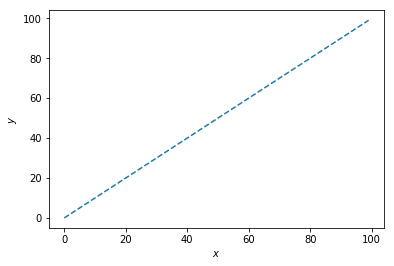

In [6]:
# Generate some data for y=w_1x+w_0, where w_0=0, and w_1=1, y ranges from 0 to 99
plt.plot([1*x+0 for x in range(100)], [x for x in range(100)], "--")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<img src="../images/simple_linear_regression_03.png">

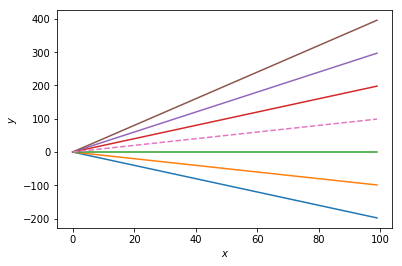

In [7]:
# Generate some data for y=w_1*x+w_0, where w_0=0, and w_1=[-2 to 5] except 1
for w_1 in range(-2, 1):
    plt.plot([x for x in range(100)], [w_1*x+0 for x in range(100)])
for w_1 in range(2, 5):
    plt.plot([x for x in range(100)], [w_1*x+0 for x in range(100)])
plt.plot([1*x+0 for x in range(100)], [i for i in range(100)], "--")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<img src="../images/simple_linear_regression_04.png">

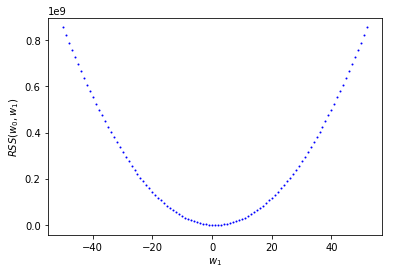

In [8]:
# Compute RSS function for different weights
# Generate some data for y=w_1*x+w_0, where w_0=0, and w_1=1, x ranges from 0 to 99
real_y = np.array([1*x+0 for x in range(100)])

# Generate some data for predicted y, where w_0=0, w_1=-50 to 52, x ranges from 0 to 99
for w_1 in range(-50, 53):
    predicted_y = np.array([w_1*x+0 for x in range(100)])
    plt.plot(w_1, RSS(real_y, predicted_y), "o", color="blue", markersize=1)
plt.xlabel('$w_1$')
plt.ylabel('$RSS(w_0, w_1)$')
plt.show()

<img src="../images/simple_linear_regression_05.png">

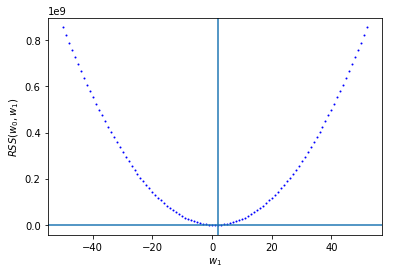

In [9]:
# Compute RSS function for different weights
# Generate some data for y=w_1*x+w_0, where w_0=0, and w_1=1, x ranges from 0 to 99
real_y = np.array([1*x+0 for x in range(100)])

# Generate some data for predicted y, where w_0=0, w_1=-50 to 52, x ranges from 0 to 99
for w_1 in range(-50, 53):
    predicted_y = np.array([w_1*x+0 for x in range(100)])
    plt.plot(w_1, RSS(real_y, predicted_y), "o", color="blue", markersize=1)
plt.xlabel('$w_1$')
plt.ylabel('$RSS(w_0, w_1)$')
plt.axvline(2)
plt.axhline(0)
plt.show()

<img src="../images/simple_linear_regression_06.png">

##### Loss with respective to $w_0$ and $w_1$

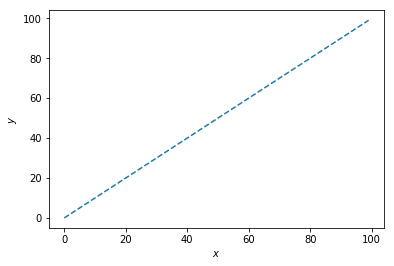

In [10]:
# Generate some data for y=w_1x+w_0, where w_0=0, and w_1=1, y ranges from 0 to 99
plt.plot([1*x+0 for x in range(100)], [x for x in range(100)], "--")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<img src="../images/simple_linear_regression_03.png">

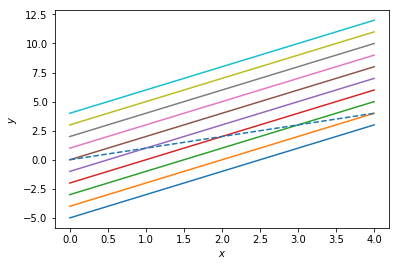

In [11]:
# Generate some data for y=w_1*x+w_0, where w_0=[-5, 5], and w_1=[2]
for w_1 in range(2, 3):
    for w_0 in range(-5, 5):
        plt.plot([x for x in range(5)], [w_1*x+w_0 for x in range(5)])
plt.plot([1*x+0 for x in range(5)], [i for i in range(5)], "--")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

<img src="../images/simple_linear_regression_07.png">

Different lines with $w_1=2$ and $w_0=[-5,4]$

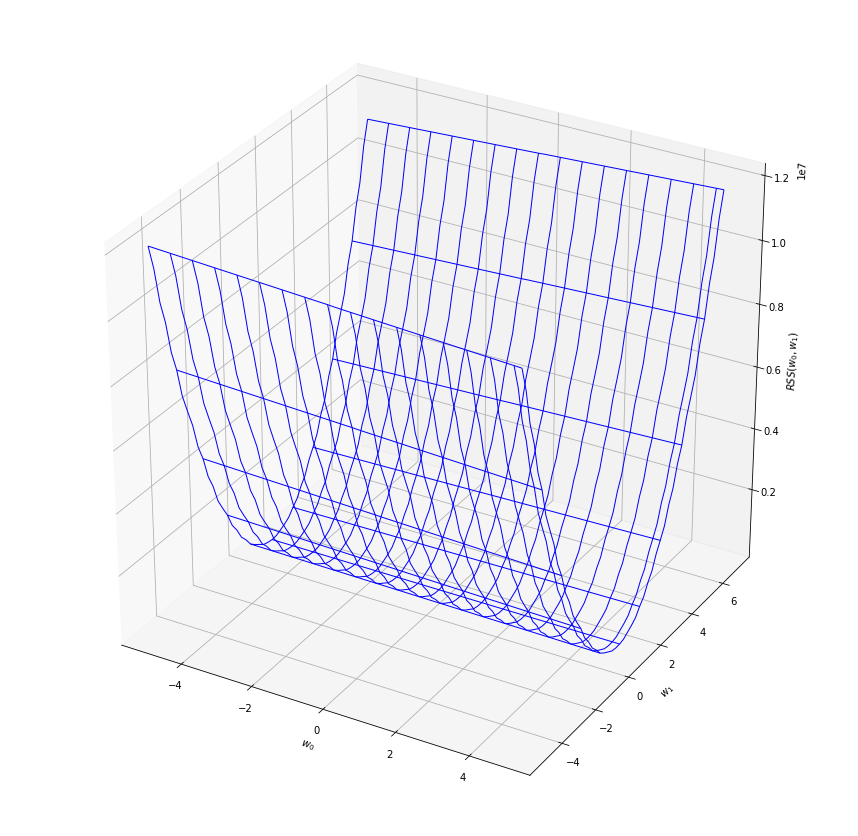

In [12]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import griddata

# Compute RSS function for different weights
# Generate some data for y=w_1*x+w_0, where w_0=0, and w_1=1, x ranges from 0 to 99
real_y = np.array([1*x+0 for x in range(100)])

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Generate some data for predicted y, where w_0=-20 to 20, w_1=-50 to 52, x ranges from 0 to 99
w_0_list = []
w_1_list = []
rss_list = []

for w_1 in np.arange(-5, 7, 0.1):
    for w_0 in np.arange(-5, 5, 0.1):
        predicted_y = np.array([w_1*x+w_0 for x in range(100)])
        w_0_list.append(w_0)
        w_1_list.append(w_1)
        rss_list.append(RSS(real_y, predicted_y))
        
w_0_list_i = np.linspace(min(w_0_list), max(w_0_list), 50)
w_1_list_i = np.linspace(min(w_1_list), max(w_1_list), 50)
rss_list_i = griddata((np.array(w_0_list), np.array(w_1_list)), np.array(rss_list), (w_0_list_i[None, :], w_1_list_i[:, None]), method='nearest')    # create a uniform spaced grid
w_0_list_ig, w_1_list_ig = np.meshgrid(w_0_list_i, w_1_list_i)

ax.plot_wireframe(w_0_list_ig, w_1_list_ig, rss_list_i, color="blue",  rstride=5, cstride=3, linewidth=1)

saved = {"x_axis": w_0_list_ig, "y_axis": w_1_list_ig, "z_axis": rss_list_i}

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$RSS(w_0, w_1)$')
plt.show()

<img src="../images/simple_linear_regression_08.png">

Widget Javascript not detected.  It may not be installed or enabled properly.


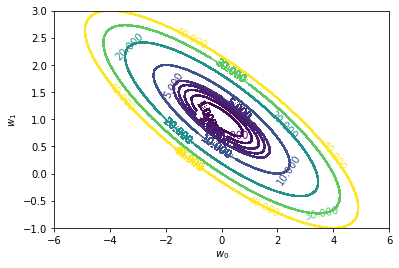

In [13]:
w_0_list_mesh, w_1_list_mesh = np.meshgrid(np.array(w_0_list), np.array(w_1_list))
rss_list_mesh = []

for w_0_list_a, w_1_list_a in tqdm.tqdm_notebook(zip(w_0_list_mesh, w_1_list_mesh)):
    rss_mesh = []
    for w_0, w_1 in zip(w_0_list_a, w_1_list_a):
        rss_mesh.append(RSS(np.array([1*x+0 for x in range(5)]), np.array([w_1*x+w_0 for x in range(5)])))
    rss_list_mesh.append(rss_mesh)

CS = plt.contour(w_0_list_mesh, w_1_list_mesh, rss_list_mesh, levels=[0, 1, 2, 3, 4, 5, 10, 20, 30, 40])
plt.axis([-6, 6, -1, 3])
plt.clabel(CS, fontsize=10)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

<img src="../images/simple_linear_regression_09.png">

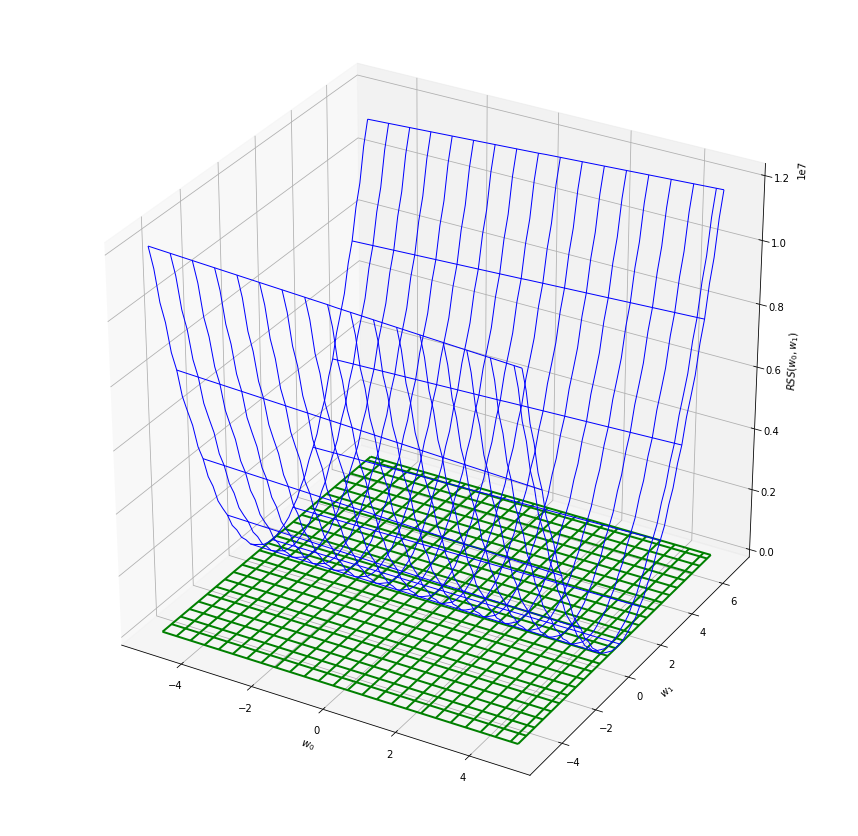

In [14]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.interpolate import griddata

# Compute RSS function for different weights
# Generate some data for y=w_1*x+w_0, where w_0=0, and w_1=1, x ranges from 0 to 99
real_y = np.array([1*x+0 for x in range(100)])

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Generate some data for predicted y, where w_0=-20 to 20, w_1=-50 to 52, x ranges from 0 to 99
w_0_list = []
w_1_list = []
rss_list = []

for w_1 in np.arange(-5, 7, 0.1):
    for w_0 in np.arange(-5, 5, 0.1):
        predicted_y = np.array([1*x+0 for x in range(100)])
        w_0_list.append(w_0)
        w_1_list.append(w_1)
        rss_list.append(RSS(real_y, predicted_y))
        
w_0_list_i = np.linspace(min(w_0_list), max(w_0_list), 50)
w_1_list_i = np.linspace(min(w_1_list), max(w_1_list), 50)
rss_list_i = griddata((np.array(w_0_list), np.array(w_1_list)), np.array(rss_list), (w_0_list_i[None, :], w_1_list_i[:, None]), method='nearest')    # create a uniform spaced grid
w_0_list_ig, w_1_list_ig = np.meshgrid(w_0_list_i, w_1_list_i)

ax.plot_wireframe(saved["x_axis"], saved["y_axis"], saved["z_axis"], color="blue", rstride=5, cstride=3, linewidth=1)
ax.plot_wireframe(w_0_list_ig, w_1_list_ig, rss_list_i, color="green",  rstride=2, cstride=2, linewidth=2)

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$RSS(w_0, w_1)$')
plt.show()

<img src="../images/simple_linear_regression_10.png">

#### Example: (Math)

$$y=0+1x$$

##### Variables:  

$
\begin{align}
x & = [1, 2, 3] \\
w_0 & = 0 \\
w_1 & = 1 \\
y & = [1, 2, 3]
\end{align}
$

##### Solve for $w_1$

$
\begin{align}
w_1 &= \frac{\sum^N_{i=1}y_ix_i-\frac{\sum^N_{i=1}y_i\sum^N_{i=1}x_i}{N}}{\sum^N_{i=1}x_i^2-\frac{\sum^N_{i=1}x_i\sum^N_{i=1}x_i}{N}} \\
&= \frac{14-\frac{6*6}{3}}{14-\frac{6*6}{3}} \\
&= 1
\end{align}
$

##### Solve for $w_0$

$
\begin{align}
w_0 & = \frac{\sum^N_{i=1}y_i}{N}-\frac{w_1\sum^N_{i=1}x_i}{N} \\
& = \frac{\sum^N_{i=1}[1, 2, 3]}{3}-\frac{1\sum^N_{i=1}[1, 2, 3]}{3} \\
& = \frac{6}{3}-\frac{1*6}{3} \\
& = 0
\end{align}
$


#### Example: (Code)

In [15]:
def w_1(y_i, x_i):
    """Compute w_1 value.
    
    Args:
        y_i (np.array): A list of y values.
        x_i (np.array): A list of x values.
    
    Returns:
        w_1 (np.float): w_1 value.
    
    """
    N = len(x_i)
    
    # sum(y_i*x_i) - sum(y_i)*sum(x_i)
    #                -----------------
    #                        N
    top = np.sum(np.multiply(y_i, x_i)) - (np.sum(y_i) * np.sum(x_i)) / N
    
    # sum(x_i^2) - sum(x_i)*sum(x_i)
    #              -----------------
    #                     N
    bottom = np.sum(np.power(x_i, 2)) - (np.sum(x_i) * np.sum(x_i))/N
    
    return top / bottom

def w_0(y_i, x_i, w_1):
    """Compute w_0 value.
    
    Args:
        y_i (np.array): A list of y values.
        x_i (np.array): A list of x values.
        w_1 (np.float): 
    
    Returns:
        w_0 (np.float): w_0 value.
    
    """
    N = len(x_i)
    
    # sum(y_i)
    # --------
    #    N
    left = np.sum(y_i) / N
    
    # w_1*sum(x_i)
    # ------------
    #      N
    right = (w_1 * np.sum(x_i)) / (N)
    
    return left-right

y_i = [1, 2, 3]
x_i = [1, 2, 3]

print("w_0: %f, w_1: %f" % (w_1(y_i, x_i), w_0(y_i, x_i, w_1(y_i, x_i))))

w_0: 1.000000, w_1: 0.000000


#### Method 2:

$
\bigtriangleup RSS(w_0, w_1) = 
\begin{bmatrix} 
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{bmatrix}
$

##### Gradient Descent:

$
\textrm{While not converged:} \\
n = \textrm{learning rate}
$

$
\begin{bmatrix}
w_0^{(t+1)}\\
w_1^{(t+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
w_0^{(t)}\\
w_1^{(t)}\\
\end{bmatrix}
-n
\bigtriangleup RSS
\begin{bmatrix}
w_0^{(t)}\\
w_1^{(t)}\\
\end{bmatrix}
$

$
\begin{bmatrix}
w_0^{(t+1)}\\
w_1^{(t+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
w_0^{(t)}\\
w_1^{(t)}\\
\end{bmatrix}
-n
\begin{bmatrix}
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
-2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{bmatrix}
$

$
\begin{bmatrix}
w_0^{(t+1)}\\
w_1^{(t+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
w_0^{(t)}\\
w_1^{(t)}\\
\end{bmatrix}
+n
\begin{bmatrix}
2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{bmatrix}
$

#### Intuition:

Using a specific $w_0$, and $w_1$, the derivative of $RSS(w_0, w_1)$ with respect to $w_0$, or $w_1$, $\frac{dRSS(w_0, w_1)}{dw_0}$, and $\frac{dRSS(w_0, w_1)}{dw_1}$ would allow us to know the "rate of change" at a specific point.

We would add the rate of change to $w_0$, if we took the derivative of $RSS(w_0, w_1)$ with respect to $w_0$, this allows us to traverse to the best $RSS$ iteration by iteration.

<img src="../images/simple_linear_regression_11.png">

<img src="../images/simple_linear_regression_13.png">

<img src="../images/simple_linear_regression_12.png">

<img src="../images/simple_linear_regression_15.png">

<img src="../images/simple_linear_regression_14.png">


#### Example (Math):

$$y=1+2x$$

##### Variables:  

$
\begin{align}
x & = [1, 2, 3] \\
w_0 & = 1 \\
w_1 & = 2 \\
y & = [1, 2, 3] \\ 
n & = 0.01
\end{align}
$

##### Compute $ 2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\ $

$
\begin{align}
2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) & = 2*((1-(2*1+1))+(2-(2*2+1))+(3-(2*3+1))) \\
& = 2*(-2+-3+-4) \\
& = 2*(-9) \\
& = -18
\end{align}
$

##### Compute $ 2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i) $

$
\begin{align}
2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i) & = 2*((1-(2*1+1))(1)+(2-(2*2+1)(2))+(3-(2*3+1))(3)) \\
& = 2*(-2(1)+-3(2)+-4(3)) \\
& = 2*(-2+-6+-12) \\
& = -40
\end{align}
$

##### Update the current weight for $w_0$ and $w_1$ simultaneously

$
\begin{bmatrix}
w_0^{(t+1)}\\
w_1^{(t+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
w_0^{(t)}\\
w_1^{(t)}\\
\end{bmatrix}
+n
\begin{bmatrix}
2\sum^N_{i=1}(y_i-(w_1x_i+w_0)) \\
2\sum^N_{i=1}(y_i-(w_1x_i+w_0))(x_i)
\end{bmatrix}
$

$
\begin{bmatrix}
w_0^{(t+1)}\\
w_1^{(t+1)}\\
\end{bmatrix}
=
\begin{bmatrix}
1\\
2\\
\end{bmatrix}
+0.01
\begin{bmatrix}
-18 \\
-40 
\end{bmatrix}
$

$
\begin{bmatrix}
0.82\\
1.60\\
\end{bmatrix}
=
\begin{bmatrix}
1\\
2\\
\end{bmatrix}
+
\begin{bmatrix}
-0.18 \\
-0.40 
\end{bmatrix}
$

#### Example (Code):

In [16]:
def gradient_descent(y_i, x_i, w_1, w_0, learning_rate, iteration=500):
    """Compute w_0 and w_1 value.
    
    Args:
        y_i (np.array): A list of y values.
        x_i (np.array): A list of x values.
        w_1 (np.float): Current w_1 value.
        w_0 (np.float): Current w_0 value.
        learning_rate (np.float): Learning rate.
        iteration (int): Number of iterations to perform gradient descent.
    
    Returns:
        w_0 (np.float): w_0 value.
        w_1 (np.float): w_1 value.
    
    """
    
    for _ in range(iteration):
        # Compute the gradient of w_0 and w_1
        # 2∑(y_i - (w_1 * x_i + w_0))
        w_0_gradient = 2 * np.sum([y_i_current - (w_1 * x_i_current + w_0) for y_i_current, x_i_current, in zip(y_i, x_i)])
        # 2∑(y_i - (w_1 * x_i + w_0)) * (x_i)
        w_1_gradient = 2 * np.sum([(y_i_current - (w_1 * x_i_current + w_0)) * x_i_current for y_i_current, x_i_current, in zip(y_i, x_i)])

        # Update w_0 and w_1 with learning rate and computed gradient
        # w_0^t+1 = w_0 + n * 2∑(y_i - (w_1 * x_i + w_0))
        w_0 = w_0 + learning_rate * w_0_gradient
        # w_0^t+1 = w_0 + n * 2∑(y_i - (w_1 * x_i + w_0) * (x_i))
        w_1 = w_1 + learning_rate * w_1_gradient
    
    return w_1, w_0

In [17]:
w_1, w_0 = gradient_descent(y_i=[1, 2, 3], x_i=[1, 2, 3], w_1=2, w_0=1, learning_rate=0.01, iteration=50000)

In [18]:
print(w_1)

1.0


In [19]:
print(w_0)

2.77281915109e-15


#### Contour Plot

In [20]:
def gradient_descent_with_historical(y_i, x_i, w_1, w_0, learning_rate, iteration=500):
    """Compute w_0 and w_1 value and record all previous w_1 and w_0 values.
    
    Args:
        y_i (np.array): A list of y values.
        x_i (np.array): A list of x values.
        w_1 (np.float): Current w_1 value.
        w_0 (np.float): Current w_0 value.
        learning_rate (np.float): Learning rate.
        iteration (int): Number of iterations to perform gradient descent.
    
    Returns:
        w_0 (np.float): w_0 value.
        w_1 (np.float): w_1 value.
        w_0_RSS (list): List of previous found w_1 values.
        w_1_RSS (list): List of previous found w_0 values.
    
    """
    w_0_list = []
    w_1_list = []
    
    for _ in range(iteration):
        # Gather historical data
        w_0_list.append(w_0)
        w_1_list.append(w_1)
        
        # Compute the gradient of w_0 and w_1
        # 2∑(y_i - (w_1 * x_i + w_0))
        w_0_gradient = 2 * np.sum([y_i_current - (w_1 * x_i_current + w_0) for y_i_current, x_i_current, in zip(y_i, x_i)])
        # 2∑(y_i - (w_1 * x_i + w_0)) * (x_i)
        w_1_gradient = 2 * np.sum([(y_i_current - (w_1 * x_i_current + w_0)) * x_i_current for y_i_current, x_i_current, in zip(y_i, x_i)])

        # Update w_0 and w_1 with learning rate and computed gradient
        # w_0^t+1 = w_0 + n * 2∑(y_i - (w_1 * x_i + w_0))
        w_0 = w_0 + learning_rate * w_0_gradient
        # w_0^t+1 = w_0 + n * 2∑(y_i - (w_1 * x_i + w_0) * (x_i))
        w_1 = w_1 + learning_rate * w_1_gradient
    
    return w_1, w_0, w_0_list, w_1_list

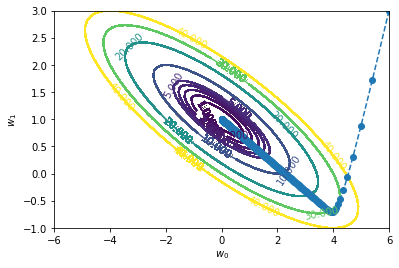

In [21]:
w_1, w_0, w_0_list, w_1_list = gradient_descent_with_historical(y_i=[1, 2, 3], x_i=[1, 2, 3], w_1=3, w_0=6, learning_rate=0.01, iteration=50000)

CS = plt.contour(w_0_list_mesh, w_1_list_mesh, rss_list_mesh, levels=[0, 1, 2, 3, 4, 5, 10, 20, 30, 40])
plt.plot(w_0_list, w_1_list, "o--")
plt.axis([-6, 6, -1, 3])
plt.clabel(CS, fontsize=10)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

#### Using on a real dataset

In [22]:
w_1, w_0 = gradient_descent(y_i=np.array(house["price"]),
                            x_i=np.array(house["sqft_living"]), w_1=np.float(1), w_0=np.float(-47000), 
                            learning_rate=np.float(7e-12), iteration=10000)

In [23]:
print(w_1)

281.998555278


In [24]:
print(w_0)

-46998.1992669


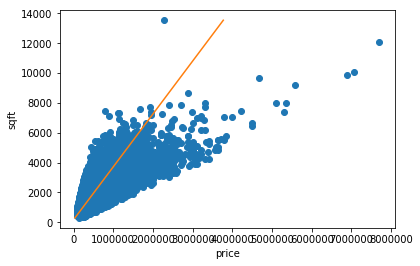

In [25]:
# Plot a graph using prices and sqft_living
plt.plot(house["price"], house["sqft_living"], "o")
plt.xlabel('price')
plt.ylabel('sqft')

# Draw a line from (0, 1000) to the top right hand corner
data = sorted([(w_1*x_i+w_0, x_i) for x_i in house["sqft_living"]], key=lambda x: x[1])
plt.plot([tup[0] for tup in data], [tup[1] for tup in data], "-")
plt.show()

#### Gradient Checking

Gradient checking allows us to make sure that our derivative is correct.

$
f'(x)=\lim_{\epsilon \to 0} \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}
$

Where we can set $\epsilon$ to a small number such as $10^{-4}$

Since we have parameters $w_0$ and $w_1$, we can perform the gradient checking seperately with respect to $w_0$, and $w_1$.

$
\begin{align}
\frac{d}{dw_0}RSS(w_0, w_1) & =\lim_{\epsilon \to 0} \frac{f(w_0+\epsilon, w_1)-f(w_0-\epsilon, w_1)}{2\epsilon} \\
\frac{d}{dw_1}RSS(w_0, w_1) & =\lim_{\epsilon \to 0} \frac{f(w_0, w_1+\epsilon)-f(w_0, w_1-\epsilon)}{2\epsilon} 
\end{align}
$

The norm between the gradient checked code and our symbolic derivation should be less than $10^{-9}$

In [26]:
def gradient_descent_with_gradient_checking(y_i, x_i, w_1, w_0, learning_rate, epsilon=1e-4, iteration=500):
    """Compute w_0 and w_1 value and checks with gradient checking.
    
    Args:
        y_i (np.array): A list of y values.
        x_i (np.array): A list of x values.
        w_1 (np.float): Current w_1 value.
        w_0 (np.float): Current w_0 value.
        learning_rate (np.float): Learning rate.
        iteration (int): Number of iterations to perform gradient descent.
    
    Returns:
        w_0 (np.float): w_0 value.
        w_1 (np.float): w_1 value.
    
    """
    
    w_0_gradient_list = []
    w_1_gradient_list = []
    w_0_gradient_checking_list = []
    w_1_gradient_checking_list = []
    
    for _ in range(iteration):
        # Compute the gradient of w_0 and w_1
        # -2∑(y_i - (w_1 * x_i + w_0))
        w_0_gradient = -2 * np.sum([y_i_current - (w_1 * x_i_current + w_0) for y_i_current, x_i_current, in zip(y_i, x_i)])
        # -2∑(y_i - (w_1 * x_i + w_0)) * (x_i)
        w_1_gradient = -2 * np.sum([(y_i_current - (w_1 * x_i_current + w_0)) * x_i_current for y_i_current, x_i_current, in zip(y_i, x_i)])
        
        # f(w_0 + ε, w_1) - f(w_0 - ε, w_1)
        # ---------------------------------
        #               2ε
        w_0_gradient_checking = (RSS(y_i, np.add(np.multiply(w_1, x_i), (w_0 + epsilon))) - 
                                 RSS(y_i, np.add(np.multiply(w_1, x_i), (w_0 - epsilon)))) / (2 * epsilon)
        
        # f(w_0, w_1 + ε) - f(w_0, w_1 - ε)
        # ---------------------------------
        #               2ε
        w_1_gradient_checking = (RSS(y_i, np.add(np.multiply((w_1 + epsilon), x_i), w_0)) - 
                                 RSS(y_i, np.add(np.multiply((w_1 - epsilon), x_i), w_0))) / (2 * epsilon)
        
        # Append to list to perform norm
        w_0_gradient_list.append(w_0_gradient)
        w_1_gradient_list.append(w_1_gradient)
        w_0_gradient_checking_list.append(w_0_gradient_checking)
        w_1_gradient_checking_list.append(w_1_gradient_checking_list)
        
        # Update w_0 and w_1 with learning rate and computed gradient
        # w_0^t+1 = w_0 - n * -2∑(y_i - (w_1 * x_i + w_0))
        w_0 = w_0 - learning_rate * w_0_gradient
        # w_0^t+1 = w_0 - n * -2∑(y_i - (w_1 * x_i + w_0) * (x_i))
        w_1 = w_1 - learning_rate * w_1_gradient
        
    print("Norm:" + str(np.linalg.norm(np.array(w_0_gradient_list) - np.array(w_0_gradient_checking_list)) /
                        np.linalg.norm(np.array(w_0_gradient_list) + np.array(w_0_gradient_checking_list))))
    
    return w_1, w_0

In [27]:
w_1, w_0 = gradient_descent_with_gradient_checking(y_i=[1, 2, 3], x_i=[1, 2, 3], w_1=3, w_0=6, learning_rate=0.01, iteration=50000)

Norm:2.06143188429e-12


In [28]:
print(w_1)

1.0


In [29]:
print(w_0)

2.77456205558e-15
